In [0]:
from google.colab import files
files.upload()

In [0]:
ncaa = pd.read_csv('NCAATourneyCompactResults.csv')
ncaa = ncaa.loc[ncaa['Season'] >= 2001]
ncaa.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1008,2001,134,1322,71,1457,67,N,0
1009,2001,136,1130,68,1381,65,N,0
1010,2001,136,1153,84,1140,59,N,0
1011,2001,136,1181,95,1284,52,N,0
1012,2001,136,1207,63,1116,61,N,0


In [0]:
conf = pd.read_csv('ConferenceTourneyGames.csv')
conf = conf[['Season','WTeamID','LTeamID']]
conf.head()

,Season,WTeamID,LTeamID
0,2001,1194,1144
1,2001,1416,1240
2,2001,1209,1194
3,2001,1359,1239
4,2001,1391,1273


In [0]:
import pandas as pd
reg_season = pd.read_csv('RegularSeasonCompactResults.csv')
reg_season = reg_season[reg_season['Season'] >= 2001][['Season','WTeamID','LTeamID']]
reg_season.head()

,Season,WTeamID,LTeamID
65026,2001,1242,1417
65027,2001,1385,1246
65028,2001,1242,1385
65029,2001,1314,1457
65030,2001,1409,1113


In [0]:
compare = ncaa[['Season','WTeamID','LTeamID']].copy()
#for i in compare.index:
#  current_row = compare.loc[i]
  


In [0]:
reg = pd.concat([reg_season,conf])
reg['Win_TeamID'] = reg['WTeamID']
reg.loc[reg['WTeamID'] > reg['LTeamID'], ['WTeamID', 'LTeamID']] = reg.loc[reg['WTeamID'] > reg['LTeamID'], ['LTeamID', 'WTeamID']].values
reg = reg.rename(columns = {'WTeamID' : 'Team1', 'LTeamID': 'Team2'})


In [0]:
compare = ncaa[['Season','WTeamID','LTeamID']].copy()
compare['Win_TeamID'] = compare['WTeamID']
compare.loc[compare['WTeamID'] > compare['LTeamID'], ['WTeamID', 'LTeamID']] = compare.loc[compare['WTeamID'] > compare['LTeamID'], ['LTeamID', 'WTeamID']].values
compare = compare.rename(columns = {'Season': 'compare_Season','WTeamID' : 'compare_Team1', 'LTeamID': 'compare_Team2','Win_TeamID': 'compare_Win_TeamID'})


,compare_Season,compare_Team1,compare_Team2,compare_Win_TeamID
1008,2001,1322,1457,1322
1009,2001,1130,1381,1130
1010,2001,1140,1153,1153
1011,2001,1181,1284,1181
1012,2001,1116,1207,1207
...,...,...,...,...
2179,2018,1181,1242,1242
2180,2018,1403,1437,1437
2181,2018,1260,1276,1276
2182,2018,1242,1437,1437


In [0]:
compare[['compare_Season','compare_Team1','compare_Team2','compare_Win_TeamID']].loc[2179]
pd.concat([compare[['compare_Season','compare_Team1','compare_Team2','compare_Win_TeamID']].loc[2179],compare[['compare_Season','compare_Team1','compare_Team2','compare_Win_TeamID']].loc[2180]])

compare_Season        2018
compare_Team1         1181
compare_Team2         1242
compare_Win_TeamID    1242
compare_Season        2018
compare_Team1         1403
compare_Team2         1437
compare_Win_TeamID    1437
dtype: int64

In [0]:
final = pd.DataFrame()
for i in compare.index:
  temp = reg.loc[reg['Season'] == compare['compare_Season'].loc[i]]
  temp = temp.loc[temp['Team1'] == compare['compare_Team1'].loc[i]]
  temp = temp.loc[temp['Team2'] == compare['compare_Team2'].loc[i]]
  if len(temp) > 0: temp['actual_win'] = compare['compare_Win_TeamID'].loc[i]
  final = pd.concat([final,temp])
  
final

In [0]:
final

,Season,Team1,Team2,Win_TeamID,actual_win
66420,2001,1112,1139,1112,1112.0
65958,2001,1336,1396,1336,1396.0
65269,2001,1112,1228,1112,1112.0
66093,2001,1112,1228,1228,1112.0
67695,2001,1181,1268,1181,1181.0
...,...,...,...,...,...
148255,2017,1196,1376,1376,1376.0
149865,2017,1196,1376,1196,1376.0
151389,2018,1211,1326,1211,1211.0
152322,2018,1139,1345,1345,1345.0


In [0]:

final_count = final.groupby(['Season','Team1','Team2']).size().reset_index().rename(columns={0:'count'})
final_merged = final_count.merge(final,how = 'left')
final_merged['T1_wins'] = [1 if final_merged['Team1'].loc[x] == final_merged['Win_TeamID'].loc[x] else -1 for x in final_merged.index]

final_merged['Actual_T1_wins'] = [1 if final_merged['Team1'].loc[x] == final_merged['actual_win'].loc[x] else -1 for x in final_merged.index]
a = final_merged.groupby(['Season', 'Team1','Team2'])['T1_wins'].sum()
b = final_merged.groupby(['Season', 'Team1','Team2'])['Actual_T1_wins'].sum()
comp = a.to_frame()
comp['actual'] = b


neutral = sum(1 for x in comp['T1_wins'] if x == 0)
correct = sum(comp['T1_wins'] == comp['actual'])
wrong = sum(comp['T1_wins'] != comp['actual'])


21

([<matplotlib.patches.Wedge at 0x7f0b96917278>,
 [Text(-0.32836625761287086, 1.0498455128547808, 'correct'),
  Text(-0.8295173176268908, -0.7224271726320156, 'neutral'),
  Text(0.44186488769512783, -1.0073506941587782, 'wrong')])

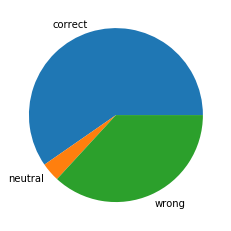

In [0]:
import matplotlib.pyplot as plt
plt.pie(x = [correct, neutral, wrong],labels = ['correct','neutral','wrong'])

In [0]:
max_count = max(final_merged['count'])
season = range(2001,2019)
right = [0] * len(season)
wrong = [0] * len(season)
neutral = [0] * len(season)
for i in season: 
  current = final_merged.loc[final_merged['Season']==i]
  for j in current.index: 
    if current['count'].loc[j] == 1:
      if current['Win_TeamID'].loc[j] == current['actual_win'].loc[j]:
        right[i] = right[i] + 1
      else: 
        wrong[i] = wrong[i] + 1
    else: 
      temp1, temp2 = 0,0
      temp1 = count()

final_merged

In [0]:
final.index

In [0]:
a = [0]*10
a

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
final = pd.concat([compare.reset_index(drop= True), reg.reset_index(drop= True)],axis = 1)
final 